<h1> Clasificarea binara cu CMMP </h1>

<h2> Formularea problemei</h2>

Se presupune ca avem exemple de semnale (vectori) din doua clase si dorim ca, pe baza lor, sa cream o regula prin care sa clasificam semnale viitoare. Notam <i>N1</i>, <i>N2</i> numarul de vectori (de antrenare) apartinand claselor <i>C1</i>, respectiv <i>C2</i>; vectorii au dimensiune <i>n</i>. Un clasicator foarte simplu este cel bazat pe CMMP. Atragem atentia ca exista metode de clasicare mai eficiente, dar si mai sofisticate. 

Acesta construieste functia liniara:
<br></br>
<math>
    f(v) = c<sup>T</sup>v+d,
 </math>
<br></br>
unde <math>v &in; &Ropf;<sup>n</sup></math> este un semnal de antrenare, iar <math>c &in; &Ropf;<sup>n</sup></math> si <math>d &in; &Ropf;</math> sunt parametrii inca necunoscuti ai functiei.

Pentru a afla acesti parametri, fixam ca obiectiv satisfacerea relatiei:
<br></br>
<math>
f(v) = 1, v &in; C1 
</math><br></br>
<math>
f(v) = -1, v &in; C2 
</math><br></br>

Desigur, aceasta relatie nu poate satisfacuta exact, de aceea cautam o solutie in sens CMMP. Notand <math> 1<sub>N</sub></math> un vector avand toate elementele egale cu 1 si dimensiune N, relatia de mai sus conducand la sistemul CMMP:

<img src="https://images2.imgbox.com/dc/a7/4dN57Dw0_o.png" alt="image host"/>

in care <math>V<sub>1</sub> &in; &Ropf;<sup>n x N1</sup></math> si <math>V<sub>2</sub> &in; &Ropf;<sup>n x N2</sup></math> > sunt matrice ale caror coloane sunt vectorii de antrenare din cele doua clase. Rezolvarea sistemului, a carui matrice are
dimensiunea (N1 + N2) x ( n + 1), produce valorile optime ale parametrilor c si d pentru aceasta metoda.

<h2> Aplicatie: Clasificarea ochilor </h2>

<h3> Etapa de antrenare </h3>

Se utilizeaza N = 100 (N = N1+N2) de poze alb-negru de dimensiune 24x24 pixel.
In faza de preprocesare s-a extras din fiecare poza caracteristica HOG (Histogram Oriented Gradient) si s-a salvat in fisierul "eye_data_lab4.csv".
De asemenea fiecare poza are asociata o eticheta cu starea ochiului ( -1 pt inchis si 1 pentru deschis ):
    <ul>
    <li> <i>N1 = 50</i>  - poze cu ochi deschisi (eticheta = 1, adica clasa C1)</li>
    <li> <i>N2 = 50</i>  - poze cu ochi inchisi (eticheta = -1, adica clasa C2)</li>
    <li> <i>n = 144</i>  - dimensiunea vectorului de caracteristici folosind caracteristica HOG cu o fereastra de 8x8.</li>
    </ul>


<h3> Citirea datelor </h3>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.feature import hog

#Citim baza de date pentru antrenare si testare
df = pd.read_csv('eye_data_lab4.csv')     # fisierul pentru antrenare
df_t = pd.read_csv('eye_data_lab4_test.csv')   # fisierul pentru testare

#pandas.DataFrame.nunique finds the unique elements(lines) of a dataset
df['label'].nunique()
#Print dataframe
df

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,label
0,0.238591,0.130380,0.262123,0,0.262123,0,0.201148,0.067049,0.238591,0.129953,...,0.090257,0.042181,0.126544,0,0.299980,0,0.082118,0.027373,0.090257,-1
1,0.090326,0.000972,0.002916,0,0.417220,0,0.164327,0.054776,0.090326,0.121101,...,0.000000,0.007561,0.022682,0,0.436925,0,0.000000,0.000000,0.000000,-1
2,0.070890,0.080562,0.241685,0,0.356489,0,0.238082,0.079361,0.070890,0.149556,...,0.010742,0.009079,0.027236,0,0.286284,0,0.039346,0.013115,0.010742,-1
3,0.166891,0.107780,0.289312,0,0.183374,0,0.039358,0.013119,0.166891,0.286761,...,0.000000,0.034336,0.103007,0,0.395755,0,0.329428,0.109809,0.000000,-1
4,0.189105,0.095399,0.286196,0,0.053598,0,0.337820,0.203436,0.189105,0.127609,...,0.000000,0.000895,0.002686,0,0.181207,0,0.073675,0.024558,0.000000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.107987,0.000000,0.000000,0,0.213978,0,0.157112,0.052371,0.107987,0.057384,...,0.000000,0.000000,0.000000,0,0.436830,0,0.108365,0.036122,0.000000,1
96,0.030618,0.036150,0.108449,0,0.380919,0,0.024013,0.008004,0.030618,0.117626,...,0.218467,0.022881,0.068644,0,0.313983,0,0.313983,0.133241,0.218467,1
97,0.020490,0.030992,0.092976,0,0.359182,0,0.024857,0.008286,0.020490,0.046807,...,0.037364,0.020198,0.060593,0,0.328898,0,0.020607,0.006869,0.037364,1
98,0.000000,0.000000,0.000000,0,0.550207,0,0.249703,0.083234,0.000000,0.129116,...,0.031098,0.000000,0.000000,0,0.346357,0,0.347085,0.134843,0.031098,1


In [7]:
# Eliminam coloana label pentru a ramane doar cu caracterisiticile pozelor
v = df.drop('label', axis=1)  # vectori de antrenare/ vectori de caracteristici
eticheta = df['label']

#Extragem nr. de date si dimensiunea unui vector caracteristic
N,n = v.shape         

#[Exercitiu]: Construiti si rezolvati problema cmmp utilizand comanda np.linalg.lstsq  
# Folositi functia np.append pentru a adauga o noua coloana la o matrice
A=np.append(v,np.ones((N,1)),axis=1)
b=eticheta
sol = np.linalg.lstsq(A,b,rcond=0)[0]

<h3> Etapa de testare </h3>

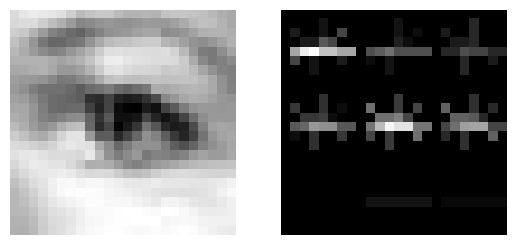

In [27]:
i = input('Introduceti o valoare intre 0 si 3: ')

#Afisarea imaginii testate
img = imread(i +'.jpg')

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img,cmap="gray")

#Binarizarea imagini -> 255 pentru alb si 0 pentru negru
thresh = 128
maxval = 255
im_bin = (img >=thresh) * maxval
img = np.uint8(im_bin)

#Extragerea caracteristicei HOG din imaginea de test
vTest, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

plt.show()

In [28]:
"""  [Obs]: Datele au fost prelucrate in matlab, unde functia de extragere a caracteristicei HOG
            considera si suprapuneri de blocuri. Prin urmare fiind prelucrate in aceasi maniera ca si datele de antrenare,
            rezultatele calsificarilor sunt mai bune decat folosind prelucrarea din python.
            ----------------------------------------------------------------------------------
# Convertim tipul de date din panda in ndarray 
v_test =df_t.to_numpy() 
#[!]:Linia din vTest corespunde cu imaginea selectata in pasul anterior 
"""
# [Exercitiu]: Testati clasificatorul, cu alte cuvinte dati formula pentru test_label (valoarea prezisa)
test_label =sol[:n].T@vTest+sol[n]
print(test_label)

if test_label >= 0: 
    print('Ochiul este deschis')
else: print('Ochiul este inchis')

-86.51661459487536
Ochiul este inchis
